Name: Ananda Amalya Hasya

Student ID: 23/511500/PA/21808

# Assignment 1 PCD

Using Google Colab, please try to a program for following tasks and provide your analysis:

*   Down Sampling (Max, Average, Medium)
*   Up Sampling (NN, Bilinear, Bicubic)
*   Uniform and Non-Uniform Quantization

Create your notebook with name as "PCD_Assignment01". You need to provide your Google Colab's code link to the text editor in submission form.

## importing libraries

cv2: For image processing using OpenCV.

matplotlib.pyplot: For plotting and displaying images.

numpy: For numerical operations, especially with arrays (images are handled as arrays).

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/MyDrive/Uni/PCD_Assignment1"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link './PCD_Assignment1': File exists


## Reading the Image and Displaying the Original Image

cv2.imread('g4g.png', 0) reads the image in grayscale mode. The 0 argument ensures the image is read as a grayscale image.

[m, n] = img1.shape retrieves the dimensions of the image, where m is the height and n is the width.

plt.imshow(img1, cmap="gray") displays the original grayscale image.

Image Shape: 1000 1000
Original Image 1 (homogenous):


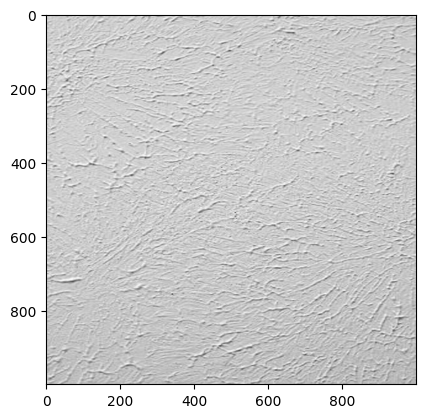

Original Image 2 (heterogenous):


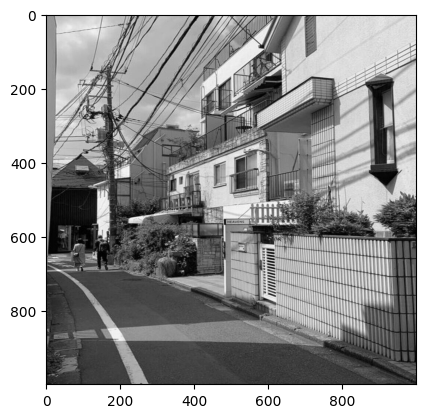

In [ ]:
img1 = cv2.imread('/content/PCD_Assignment1/homogenous.jpg', 0)
img2 = cv2.imread('/content/PCD_Assignment1/heterogenous.jpg', 0)
[m, n] = img1.shape
print('Image Shape:', m, n)

print('Original Image 1 (homogenous):')
plt.imshow(img1, cmap="gray")
plt.show()
print('Original Image 2 (heterogenous):')
plt.imshow(img2, cmap="gray")
plt.show()
f = 4

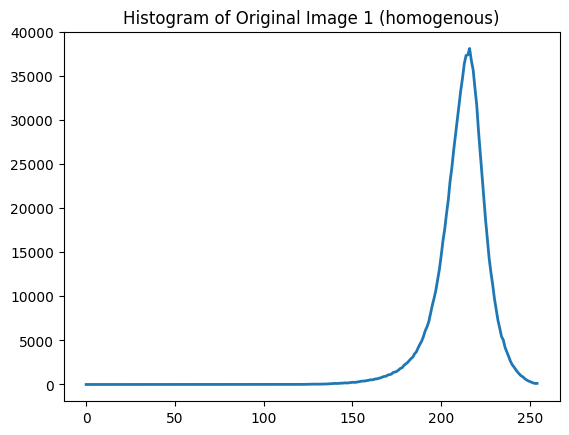

In [ ]:
n_colors = 2
plt.figure(2)
plt.clf()
plt.title("Histogram of Original Image 1 (homogenous)")
hist = np.histogram(img1, bins=np.arange(0,256))
plt.plot(hist[1][:-1], hist[0], lw=2)

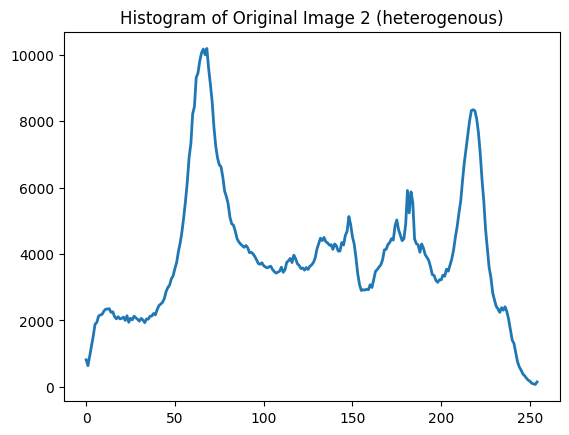

In [ ]:
plt.title("Histogram of Original Image 2 (heterogenous)")
hist = np.histogram(img2, bins=np.arange(0,256))
plt.plot(hist[1][:-1], hist[0], lw=2)

## Downsampling


### Max Downsampling


In [ ]:
def max_downsample(image, f):
    m, n = image.shape
    img_downsampled = np.zeros((m//f, n//f), dtype=int)
    for i in range(0, m, f):
        for j in range(0, n, f):
            block = image[i:i+f, j:j+f]
            img_downsampled[i//f, j//f] = np.max(block)
    return img_downsampled

Max Down Sampled Image 1 (homogenous):


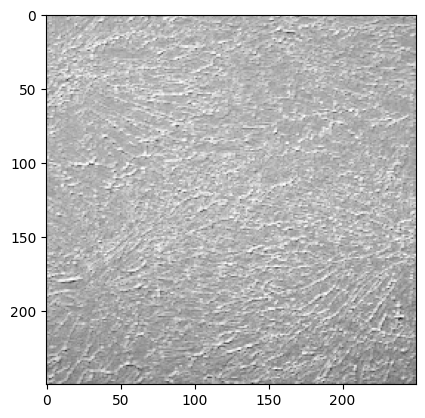

In [ ]:
max_imghom = max_downsample(img1, f)
print('Max Down Sampled Image 1 (homogenous):')
plt.imshow(max_imghom, cmap="gray")
plt.show()

when compared to the original image, this one is slightly darker and the textures of the wall are far more pronounced and highlighted.

Max Down Sampled Image 1 (heterogenous):


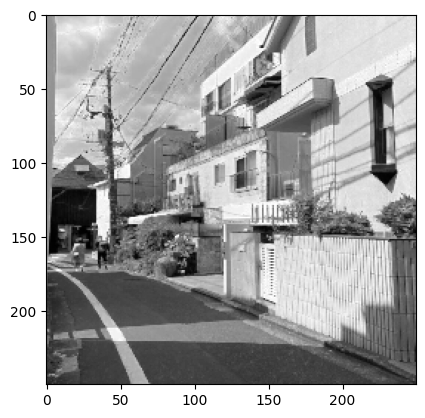

In [ ]:
max_imghet = max_downsample(img2, f)
print('Max Down Sampled Image 1 (heterogenous):')
plt.imshow(max_imghet, cmap="gray")
plt.show()

in this image it is obvious that a lot of the details as well as the lines are more distorted and more difficult to see


### Average (mean) Downsampling



In [ ]:
def average_downsample(image, f):
    m, n = image.shape
    img_downsampled = np.zeros((m//f, n//f), dtype=int)
    for i in range(0, m, f):
        for j in range(0, n, f):
            block = image[i:i+f, j:j+f]
            img_downsampled[i//f, j//f] = np.mean(block)
    return img_downsampled

Average Down Sampled Image 1 (homogenous):


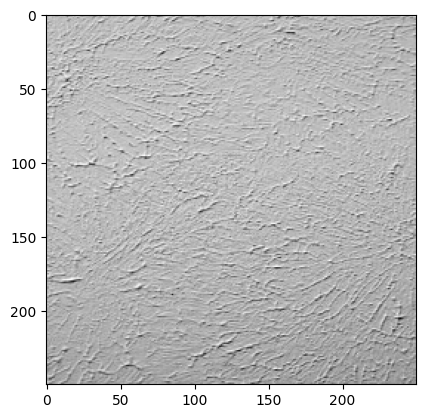

In [ ]:
avg_imghom = average_downsample(img1, f)
print('Average Down Sampled Image 1 (homogenous):')
plt.imshow(avg_imghom, cmap="gray")
plt.show()

using the mean downsampling, this image is far closer to the original when compared to the max downsampling, with the only visible change being a small amount of additional contrast

Average Down Sampled Image 2 (heterogenous):


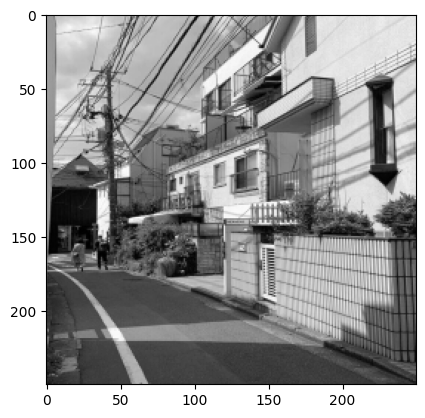

In [ ]:
avg_imghet = average_downsample(img2, f)
print('Average Down Sampled Image 2 (heterogenous):')
plt.imshow(avg_imghet, cmap="gray")
plt.show()

just like the homogenous image, this image is a lot more like the original image when compared to the max downsampling, with the lines still being visible and not distorted

### Median Downscaling


In [ ]:
def median_downsample(image, f):
    m, n = image.shape
    new_m, new_n = m // f, n // f
    img_downsampled = np.zeros((new_m, new_n), dtype=int)
    for i in range(new_m):
        for j in range(new_n):
            block = image[i*f:(i+1)*f, j*f:(j+1)*f]
            img_downsampled[i, j] = np.median(block)
    return img_downsampled

Median Down Sampled Image 1 (homogenous):


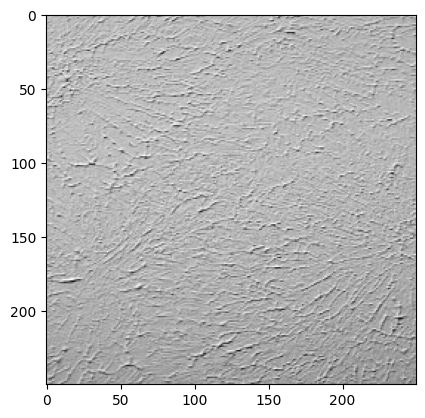

In [ ]:
med_imghom = median_downsample(img1, f)
print('Median Down Sampled Image 1 (homogenous):')
plt.imshow(med_imghom, cmap="gray")
plt.show()

for this image there is not much visible differences between this image and the average down sampled image

Median Down Sampled Image 2 (heterogenous):


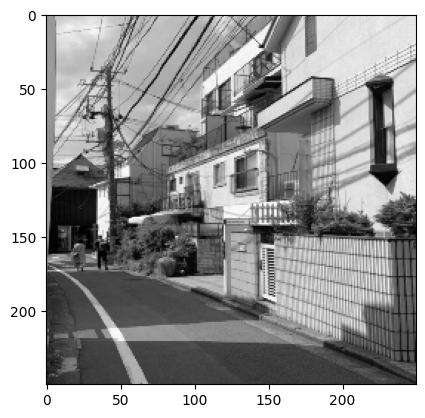

In [ ]:
med_imghet = median_downsample(img2, f)
print('Median Down Sampled Image 2 (heterogenous):')
plt.imshow(med_imghet, cmap="gray")
plt.show()

just like the previous image, this image has little visible differences between this image and the average down sampled image

## Upsampling


### Nearest Neighbour Upsampling


In [ ]:
def upsample_nearest(image, f):
    m, n = image.shape
    img_up = np.zeros((m * f, n * f), dtype=int)

    for i in range(m):
        for j in range(n):
            img_up[i * f:(i + 1) * f, j * f:(j + 1) * f] = image[i, j]

    return img_up

Nearest Neighbour Up Sampled Image 1 from Max Down Sampling (homogenous):


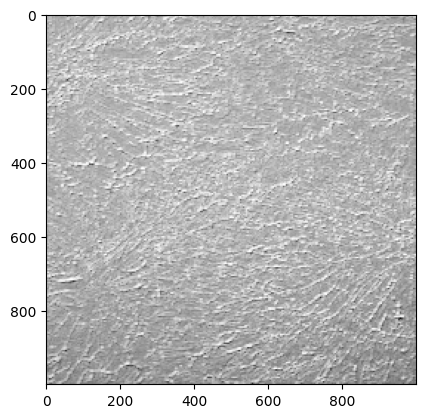

Nearest Neighbour Up Sampled Image 1 from Mean (average) Down Sampling (homogenous:


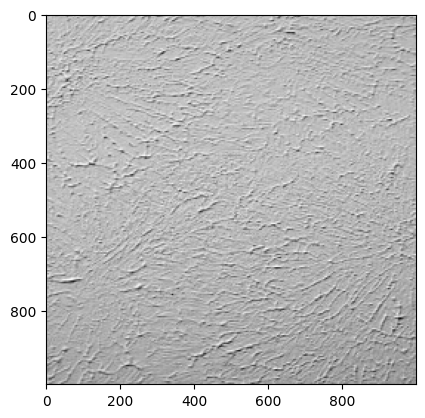

Nearest Neighbour Up Sampled Image 1 from Median Down Sampling (homogenous:


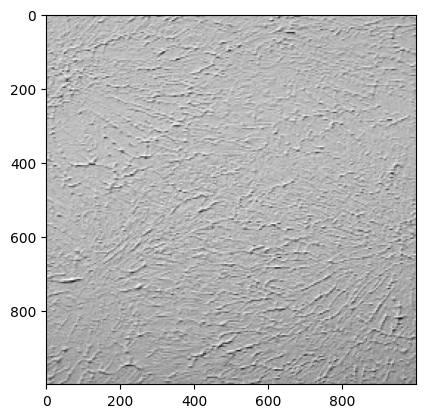

In [ ]:
img_nnmax1 = upsample_nearest(max_imghom, f)
print('Nearest Neighbour Up Sampled Image 1 from Max Down Sampling (homogenous):')
plt.imshow(img_nnmax1, cmap="gray")
plt.show()

img_nnavg1 = upsample_nearest(avg_imghom, f)
print('Nearest Neighbour Up Sampled Image 1 from Mean (average) Down Sampling (homogenous:')
plt.imshow(img_nnavg1, cmap="gray")
plt.show()

img_nnmed1 = upsample_nearest(med_imghom, f)
print('Nearest Neighbour Up Sampled Image 1 from Median Down Sampling (homogenous:')
plt.imshow(img_nnmed1, cmap="gray")
plt.show()

the max downsampled image when upsampled using the nearest neighbour method outputs a slightly distorted image which while reminiscent of the original pictire, isnt accurate. meanwhile the two upsampled image from the median and mean donwsampled image both seem very similar to each other, as well as to the original image with a slight more obvious texture of the wall


Nearest Neighbour Up Sampled Image 2 from Max Down Sampling (heterogenous):


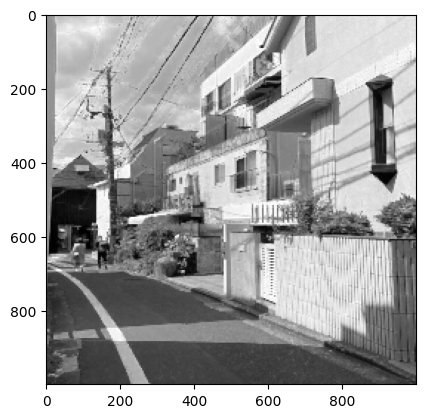

Nearest Neighbour Up Sampled Image 2 from Mean (average) Down Sampling (heterogenous:


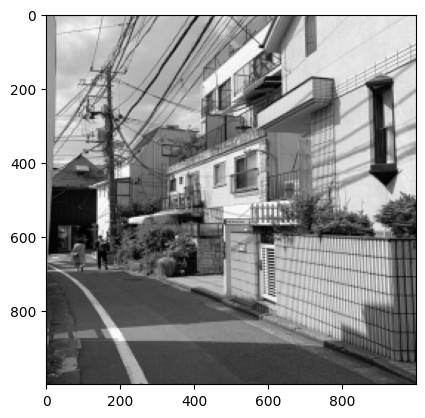

Nearest Neighbour Up Sampled Image 2 from Median Down Sampling (heterogenous:


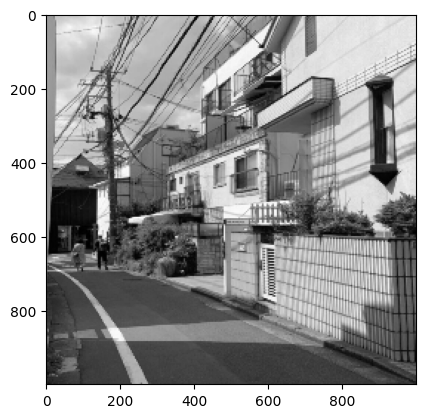

In [ ]:
img_nnmax2 = upsample_nearest(max_imghet, f)
print('Nearest Neighbour Up Sampled Image 2 from Max Down Sampling (heterogenous):')
plt.imshow(img_nnmax2, cmap="gray")
plt.show()

img_nnavg2 = upsample_nearest(avg_imghet, f)
print('Nearest Neighbour Up Sampled Image 2 from Mean (average) Down Sampling (heterogenous:')
plt.imshow(img_nnavg2, cmap="gray")
plt.show()

img_nnmed2 = upsample_nearest(med_imghet, f)
print('Nearest Neighbour Up Sampled Image 2 from Median Down Sampling (heterogenous:')
plt.imshow(img_nnmed2, cmap="gray")
plt.show()

### Bilinear Up Sampling


In [ ]:
def upsample_bilinear(image, f):
    m, n = image.shape
    img_up = np.zeros((m * f, n * f), dtype=int)

    for i in range(m - 1):
        for j in range(n - 1):
            x = i * f
            y = j * f
            x_diff = (x + f) - (i * f)
            y_diff = (y + f) - (j * f)

            a = image[i, j]
            b = image[i, j + 1]
            c = image[i + 1, j]
            d = image[i + 1, j + 1]

            for x_sub in range(f):
                for y_sub in range(f):
                    img_up[x + x_sub, y + y_sub] = (a * (1 - x_diff) * (1 - y_diff) +
                                                     b * x_diff * (1 - y_diff) +
                                                     c * y_diff * (1 - x_diff) +
                                                     d * x_diff * y_diff)

    return img_up

Bilinear Up Sampled Image 1 from Max Down Sampling (homogenous):


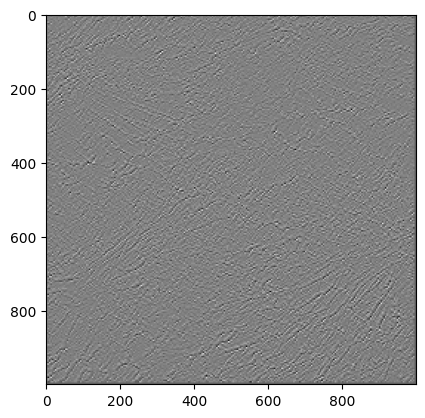

Bilinear Up Sampled Image 1 from Mean (average) Down Sampling (homogenous):


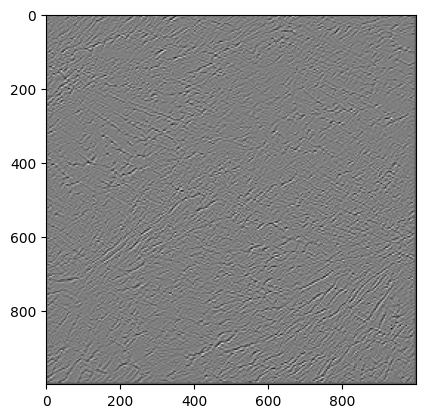

Bilinear Up Sampled Image 1 from Median Down Sampling (homogenous):


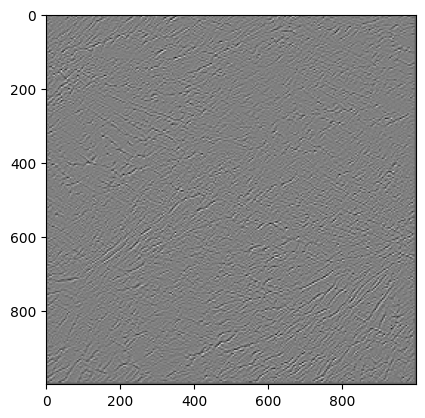

In [ ]:
img_bilmax1 = upsample_bilinear(max_imghom, f)
print('Bilinear Up Sampled Image 1 from Max Down Sampling (homogenous):')
plt.imshow(img_bilmax1, cmap="gray")
plt.show()

img_bilavg1 = upsample_bilinear(avg_imghom, f)
print('Bilinear Up Sampled Image 1 from Mean (average) Down Sampling (homogenous):')
plt.imshow(img_bilavg1, cmap="gray")
plt.show()

img_bilmed1 = upsample_bilinear(med_imghom, f)
print('Bilinear Up Sampled Image 1 from Median Down Sampling (homogenous):')
plt.imshow(img_bilmed1, cmap="gray")
plt.show()

all of the images that are upsampled using the median down sampling turned out much darker and with less obvious textures compared to the original, regardless of the method of downsampling.

Bilinear Up Sampled Image 2 from Max Down Sampling (heterogenous):


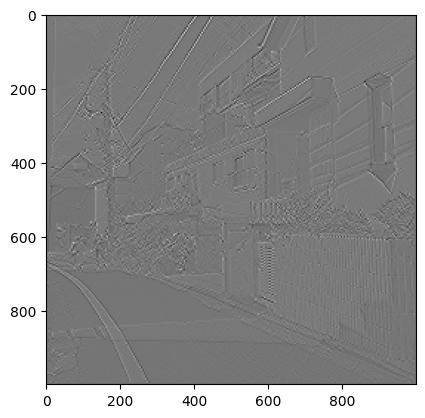

Bilinear Up Sampled Image 2 from Mean (average) Down Sampling (heterogenous):


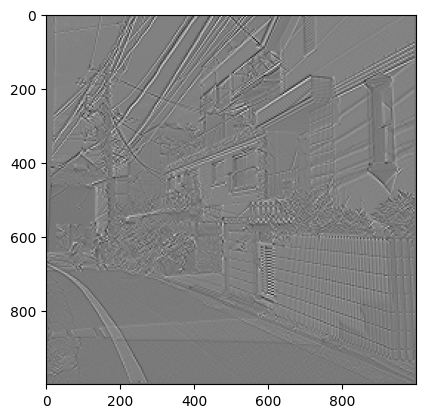

Bilinear Up Sampled Image 2 from Median Down Sampling (heterogenous):


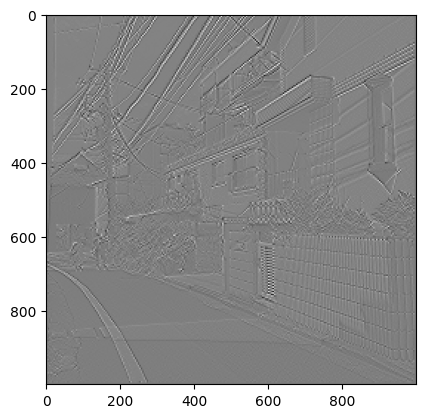

In [ ]:
img_bilmax2 = upsample_bilinear(max_imghet, f)
print('Bilinear Up Sampled Image 2 from Max Down Sampling (heterogenous):')
plt.imshow(img_bilmax2, cmap="gray")
plt.show()

img_bilavg2 = upsample_bilinear(avg_imghet, f)
print('Bilinear Up Sampled Image 2 from Mean (average) Down Sampling (heterogenous):')
plt.imshow(img_bilavg2, cmap="gray")
plt.show()

img_bilmed2 = upsample_bilinear(med_imghet, f)
print('Bilinear Up Sampled Image 2 from Median Down Sampling (heterogenous):')
plt.imshow(img_bilmed2, cmap="gray")
plt.show()

just like the homogenous image, all of the images here are much darker and with much less visible details compared to the original regardless of the initial downsampling method



### Bicubic Up Sampling

In [ ]:
def cubic(t):
    abs_t = np.abs(t)
    if abs_t <= 1:
        return (1.5 * abs_t**3 - 2.5 * abs_t**2 + 1)
    elif abs_t < 2:
        return (-0.5 * abs_t**3 + 2.5 * abs_t**2 - 4 * abs_t + 2)
    else:
        return 0

In [ ]:
def upsample_bicubic(image, f):
    m, n = image.shape
    img_up = np.zeros((m * f, n * f), dtype=int)

    for i in range(m - 1):
        for j in range(n - 1):
            x = i * f
            y = j * f

            for x_sub in range(f):
                for y_sub in range(f):
                    x_norm = x_sub / f
                    y_norm = y_sub / f

                    top_left = image[i, j]
                    top_right = image[i, j + 1]
                    bottom_left = image[i + 1, j]
                    bottom_right = image[i + 1, j + 1]

                    top = top_left * (1 - x_norm) + top_right * x_norm
                    bottom = bottom_left * (1 - x_norm) + bottom_right * x_norm

                    pixel_value = int(top * (1 - y_norm) + bottom * y_norm)
                    img_up[x + x_sub, y + y_sub] = pixel_value

    return img_up

Bicubic Up Sampled Image 1 from Max Down Sampling (homogenous):


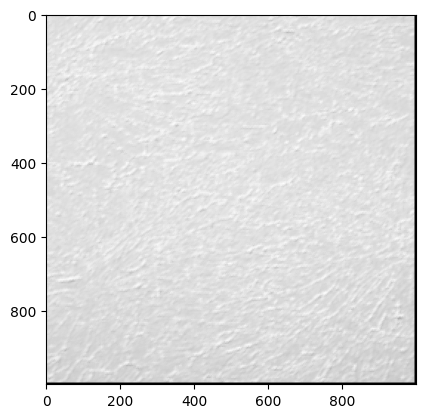

Bicubic Up Sampled Image 1 from Mean (average) Down Sampling (homogenous):


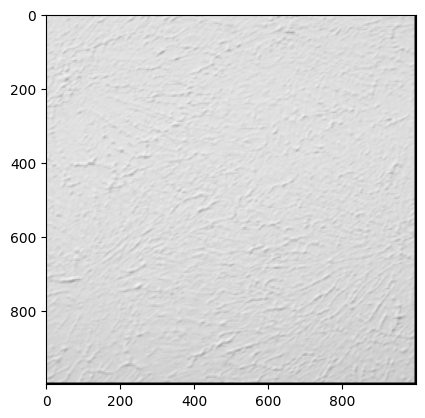

Bicubic Up Sampled Image 1 from Median Down Sampling (homogenous):


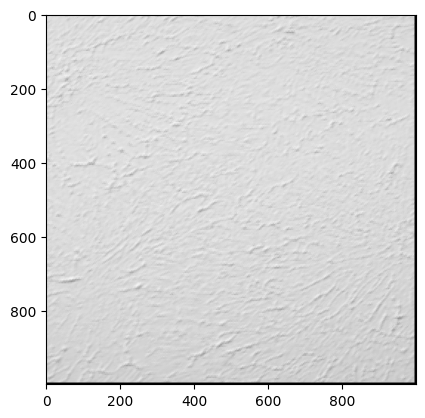

In [ ]:
img_bicmax1 = upsample_bicubic(max_imghom, f)
print('Bicubic Up Sampled Image 1 from Max Down Sampling (homogenous):')
plt.imshow(img_bicmax1, cmap="gray")
plt.show()

img_bicavg1 = upsample_bicubic(avg_imghom, f)
print('Bicubic Up Sampled Image 1 from Mean (average) Down Sampling (homogenous):')
plt.imshow(img_bicavg1, cmap="gray")
plt.show()

img_bicmed1 = upsample_bicubic(med_imghom, f)
print('Bicubic Up Sampled Image 1 from Median Down Sampling (homogenous):')
plt.imshow(img_bicmed1, cmap="gray")
plt.show()

just like the nearest neighbour upsampling, the mean and median downsampled image performed similarly when upsampled using the bicubic upsampling method, with the max downsampled image being the only one somewhat distorted from the original.

Bicubic Up Sampled Image 2 from Max Down Sampling (heterogenous):


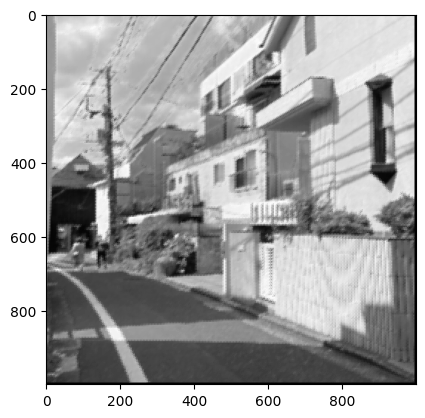

Bicubic Up Sampled Image 2 from Mean (average) Down Sampling (heterogenous):


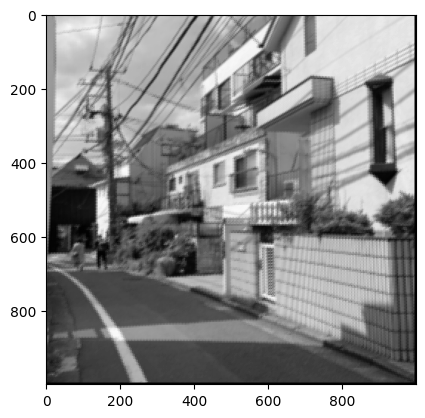

Bicubic Up Sampled Image 2 from Median Down Sampling (heterogenous):


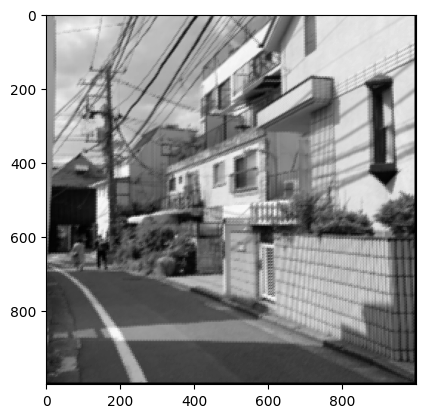

In [ ]:
img_bicmax2 = upsample_bicubic(max_imghet, f)
print('Bicubic Up Sampled Image 2 from Max Down Sampling (heterogenous):')
plt.imshow(img_bicmax2, cmap="gray")
plt.show()

img_bicavg2 = upsample_bicubic(avg_imghet, f)
print('Bicubic Up Sampled Image 2 from Mean (average) Down Sampling (heterogenous):')
plt.imshow(img_bicavg2, cmap="gray")
plt.show()

img_bicmed2 = upsample_bicubic(med_imghet, f)
print('Bicubic Up Sampled Image 2 from Median Down Sampling (heterogenous):')
plt.imshow(img_bicmed2, cmap="gray")
plt.show()

like the homogenous image, the median and mean downsampled image performed similarly when upsampled, with only minor differences. in comparison, the max downsampled image has much less visible lines such as in the power lines, along with the distortion of the lines in the wall fence, the straight line visibly curving instead. this leads me to conclude that max downsampling may not be the best option when compared to mean and median downsampling, as it performs much better when upsampled though multiple methods


## Quantization


### Uniform Quantization

In [ ]:
def uniform_quantization(image, levels):
  min_pixel = np.min(image)
  max_pixel = np.max(image)
  step_size = (max_pixel - min_pixel) / levels
  quantized_image = np.round((image - min_pixel) / step_size) * step_size + min_pixel
  quantized_image = np.clip(quantized_image, min_pixel, max_pixel)

  return quantized_image.astype(np.uint8)


Uniform Quantized Image (homogenous):


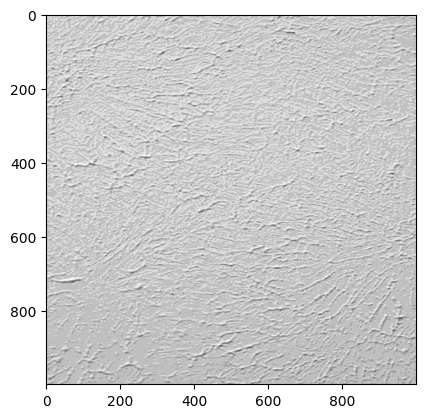

In [ ]:
img_quantizeduniform = uniform_quantization(img1, 8)
print('Uniform Quantized Image (homogenous):')
plt.imshow(img_quantizeduniform, cmap="gray")
plt.show()

Uniform Quantized Image (heterogenous):


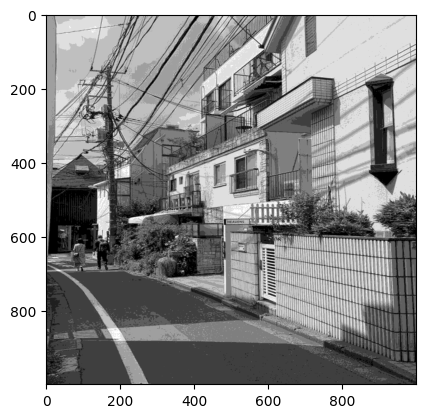

In [ ]:
img_quantizeduniform = uniform_quantization(img2, 8)
print('Uniform Quantized Image (heterogenous):')
plt.imshow(img_quantizeduniform, cmap="gray")
plt.show()

both uniformly quantized images looks similar to the original image

### Non-Uniform Quantization


Examine the histogram of the original image.
If the histogram is heavily skewed towards lower intensity values, a higher 'c' value might be appropriate to enhance detail in those regions.
If the histogram is more evenly distributed, a lower 'c' value might be sufficient.


In [ ]:
from sklearn.cluster import KMeans
def find_values_thresholds(img):
  pixels = img.reshape(-1,1)
  n_clusters = 10
  kmeans = KMeans(n_clusters = n_clusters, random_state=0)
  kmeans = kmeans.fit(pixels)
  centers = np.sort(kmeans.cluster_centers_.flatten())
  thresholds = [(centers[i] + centers[i + 1]) / 2 for i in range(len(centers) - 1)]
  values = centers
  return thresholds, values

In [ ]:
def non_uniform_quantization(image, thresholds, values):

    thresholds = sorted(thresholds)
    values = [values[i] for i in range(len(thresholds))]

    quantized_image = np.zeros_like(image)

    for i in range(len(thresholds) - 1):
        lower_bound = thresholds[i]
        upper_bound = thresholds[i + 1]
        quantized_image[(image >= lower_bound) & (image < upper_bound)] = values[i]

    quantized_image[image >= thresholds[-1]] = values[-1]

    return quantized_image


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thresholds image 1 (homogenous): [161.57819013833694, 179.86278103207724, 192.4404200919475, 201.19985834913732, 207.41931395473233, 212.79703246107928, 218.55084238371617, 225.36172593238592, 234.3414081653524]
Quantized Values image 1 (homogenous): [150.6467336  172.50964668 187.21591538 197.6649248  204.7347919
 210.10383601 215.49022891 221.61145586 229.11199601 239.57082032]
Non-Uniform Quantized Image 1 (homogenous):


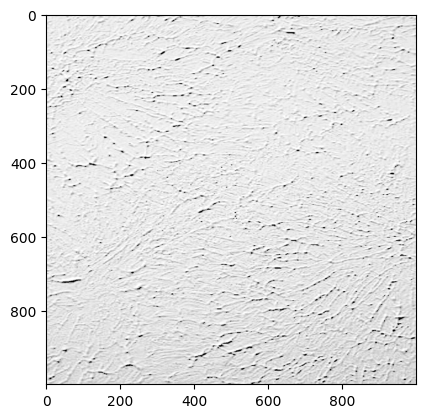

In [ ]:
thresholds1 = find_values_thresholds(img1)[0]
values1 = find_values_thresholds(img1)[1]
print("Thresholds image 1 (homogenous):", thresholds1)
print("Quantized Values image 1 (homogenous):", values1)
quantized_img1 = non_uniform_quantization(img1, thresholds1, values1)
print('Non-Uniform Quantized Image 1 (homogenous):')
plt.imshow(quantized_img1, cmap="gray")
plt.show()

in the non uniform quantization, the homogenous image has massive differences in colour compared to the original, while it is still recognizable, it is not as accurate to the original image as the uniform quantized image is.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thresholds image 2 (heterogenous): [35.577259917394734, 62.092865469093766, 83.45501806016307, 108.06264658847842, 132.39329853443533, 156.28844359441405, 178.46699141607945, 200.64983177525158, 221.47983846691267]
Quantized Values image 2 (heterogenous): [ 18.50820209  52.64631774  71.53941319  95.37062293 120.75467025
 144.03192682 168.54496037 188.38902246 212.91064109 230.04903585]
Non-Uniform Quantized Image 2 (heterogenous):


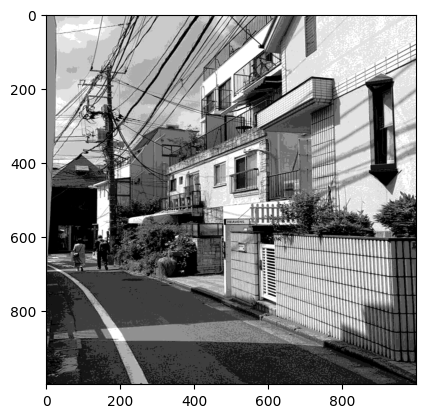

In [ ]:
thresholds2 = find_values_thresholds(img2)[0]
values2 = find_values_thresholds(img2)[1]
print("Thresholds image 2 (heterogenous):", thresholds2)
print("Quantized Values image 2 (heterogenous):", values2)
quantized_img2 = non_uniform_quantization(img2, thresholds2, values2)
print('Non-Uniform Quantized Image 2 (heterogenous):')
plt.imshow(quantized_img2, cmap="gray")
plt.show()

in comparison, the heterogenous image essentially maintains all its original qualities.